# **ROBUST REGRESSION**

In [1]:
# Crucial Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

plt.rcParams["figure.figsize"] = (16,9) 

In [2]:
# Import the data 
df = pd.read_csv("M2. module_2_data.csv")

In [3]:
df.head()

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016


### **Huber's Model**

In [11]:
# Robust Regression model
rr_huber = sm.RLM(
    df["DXY"], sm.add_constant(df["X10Y_TBY"]), M=sm.robust.norms.HuberT()
)
rr_huber_results = rr_huber.fit()
rr_huber_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                    DXY   No. Observations:                  250
Model:                            RLM   Df Residuals:                      248
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 03 Sep 2025                                         
Time:                        01:48:43                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.673e-05      0.000      0.367      0.714      -0.000       0.001
X10Y_TBY       0.0446      0.011      4.152      0.000       0.024       0.066
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### **Bisquare or Tukey Biweight Model**

In [12]:
# Bisquare Method 
rr_bisquare = sm.RLM(df["DXY"],sm.add_constant(df["X10Y_TBY"]),M=sm.robust.norms.TukeyBiweight())
rr_bisquare_results = rr_bisquare.fit()
rr_bisquare_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                    DXY   No. Observations:                  250
Model:                            RLM   Df Residuals:                      248
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 03 Sep 2025                                         
Time:                        01:52:05                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.698e-05      0.000      0.254      0.800      -0.000       0.001
X10Y_TBY       0.0515      0.011      4.797      0.000       0.030       0.073
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### **OLS and WLS Model**

In [14]:
# WLS model
model_1 = smf.ols("DXY ~ X10Y_TBY", data=df).fit()

# Add Absolute residuals and fitted values to dataset columns
df["abs_residuals"] = np.abs(model_1.resid)
df["fitted_values"] = model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp = smf.ols("abs_residuals ~ fitted_values", data=df).fit()

# Compute weights and add it to the data_set column
weights = model_temp.fittedvalues
weights = weights**-2
df["weights"] = weights

# WLS model
Y = df["DXY"].tolist()
X = df["X10Y_TBY"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, df["weights"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            WLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     27.59
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           3.23e-07
Time:                        01:56:22   Log-Likelihood:                 994.52
No. Observations:                 250   AIC:                            -1985.
Df Residuals:                     248   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.346      0.730      -0.000       0.001
x1             0.0516      0.010      5.253      0.000       0.032       0.071
==============================================================================
Omnibus:                       10.978   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.475
Skew:                           0.063   Prob(JB):                     7.99e-06
Kurtosis:                       4.496   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's compare the coefficients of ***x10Y_TBY*** from the three methods.
 
**Observations**
1. We can see that WLS and bisquare method have similar coefficients for **x10Y_TBY** (WLS: 0.0516; Bisquare: 0.0515).
2. As both WLS and bisquare method give different weights to all data points therefore they have identical coefficients.
3. Whereas Huber gives different weights only after a residual is big enough

### **Comparision of All Models in Scatter Plot**

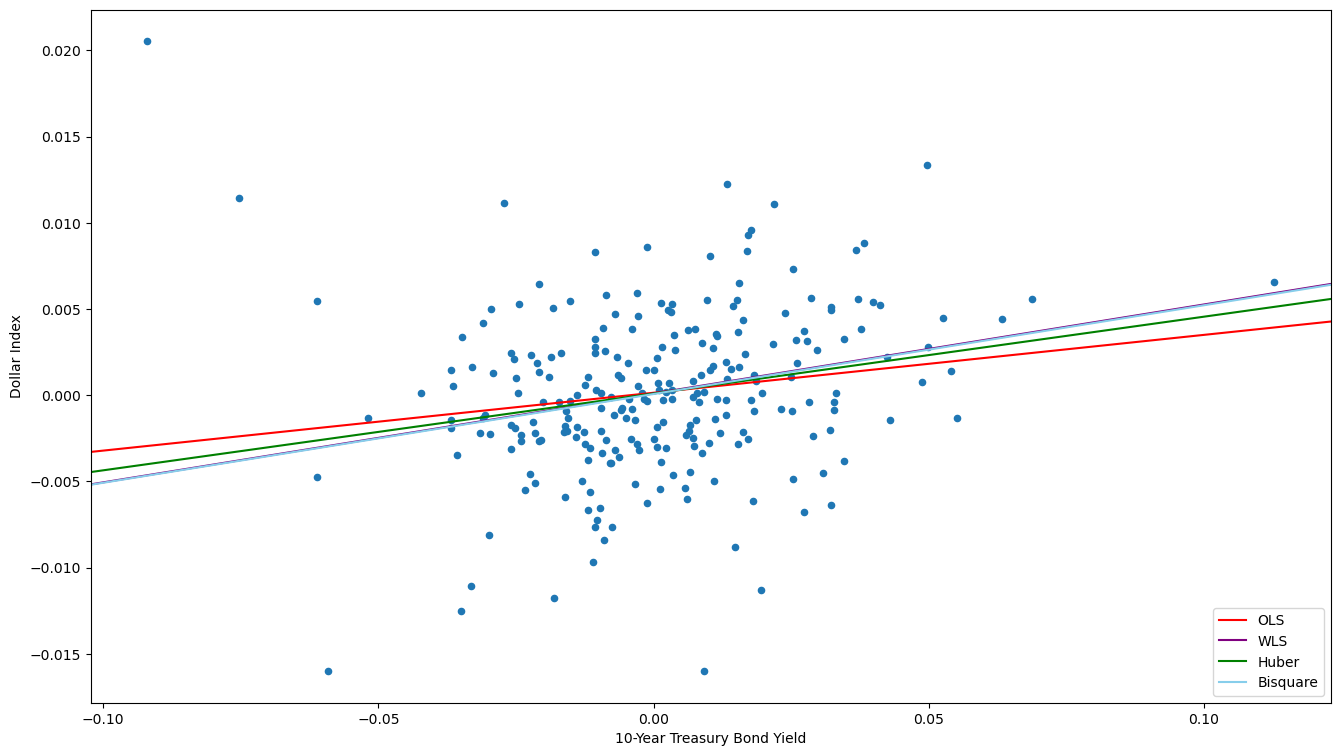

In [21]:
# Scatter Plot of U.S. Dollar Index Daily Return and 10-Year Treasury Bond Yield Daily Return with Different Regression Lines

# scatter-plot data
scatt = df.plot(x="X10Y_TBY", y="DXY", kind="scatter")
scatt.set(xlabel="10-Year Treasury Bond Yield", ylabel="Dollar Index")

# plot regression lines
abline_plot(model_results=model_1, ax=scatt, color="red", label="OLS")
abline_plot(model_results=model_WLS, ax=scatt, color="purple", label="WLS")
abline_plot(model_results=rr_huber_results, ax=scatt, color="green", label="Huber")
abline_plot(model_results=rr_bisquare_results, ax=scatt, color="skyblue", label="Bisquare")
plt.legend(loc="lower right")
plt.show()

**Observations**
1. It can be seen that the WLS regression line and the bisquare regression line almost overlap.
2. WLS and Bisquare are also furthest away from outliers at the upper left of the scatter plot.
3. The OLS regression line and Huber regression line are flatter and are pulled closer to the outliers at the upper left.
4. The plot shows evidence again that WLS and the bisquare method apply weights to de-emphasize any data point that has a non-zero residual.
5. OLS applies the weight of $1$, and the Huber method applies weight after data points whose residuals are larger than $k$.

**Different weight schemes would lead to different regression results. After studying the above results, either WLS or the bisquare method is a better result than OLS or the Huber method.**